# 가위바위보 분류기

In [52]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [54]:
# 이미지 사이즈 조절 함수 정의
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")


#### 학습 데이터(300) /rock_scissor_paper/

In [55]:
# 가위/바위/보 이미지 변환 
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [56]:
# 데이터 로드 함수 정의
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels    

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)
라벨:  0


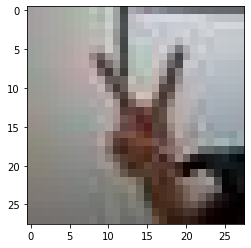

In [57]:
# 데이터 로드 및 전처리
import numpy as np
import matplotlib.pyplot as plt
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/"

(x_train, y_train)=load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# 이미지 확인
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [58]:
# 딥러닝 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras

# model 생성
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

In [59]:
x_train_norm.shape
y_train.shape

(300,)

In [60]:
# 딥러닝 네트워크 학습시키기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 2.1540 - accuracy: 0.2225
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.4471 - accuracy: 0.3507
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0355 - accuracy: 0.4382
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9018 - accuracy: 0.6036
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8364 - accuracy: 0.6196
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7645 - accuracy: 0.7070
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.8158
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.8571
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.8976
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.9184


#### 테스트 데이터(300) rock_scissor_paper/test/

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
라벨:  0


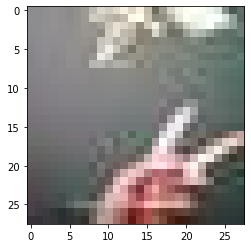

In [61]:
# 테스트 데이터 준비 ( 1 )
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/"
(x_test, y_test)=load_data(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

# 이미지 확인
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [62]:
# 테스트 데이터로 성능확인 ( 첫번째 테스트 데이터 )
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.2252 - accuracy: 0.3767
test_loss: 1.2251577377319336 
test_accuracy: 0.3766666650772095


In [63]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [5.4632354e-01 2.9436508e-01 1.5919237e-01 7.7964578e-06 2.7413371e-05
 4.9561883e-08 4.5660739e-11 5.0184944e-08 4.4945232e-06 7.9227881e-05]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


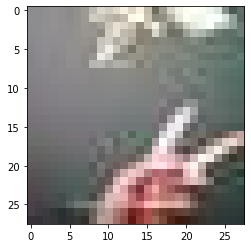

In [64]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [7.1039073e-02 4.1031845e-02 8.8792616e-01 3.9695987e-08 3.6367551e-10
 9.8132669e-10 5.5345695e-10 1.1060097e-06 8.5639425e-07 9.3548931e-07]
라벨: 1, 예측결과: 2


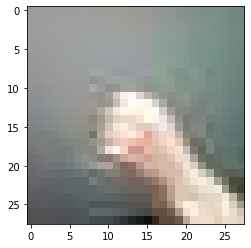

예측확률분포: [2.0146840e-03 5.6938468e-03 9.9229091e-01 2.2663462e-09 1.5485812e-11
 1.5193538e-10 5.4233160e-11 9.1652105e-08 1.3235780e-07 2.9742216e-07]
라벨: 1, 예측결과: 2


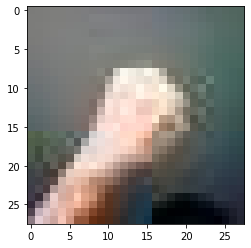

예측확률분포: [2.5614280e-01 7.4930102e-02 6.6892648e-01 1.2596215e-08 3.0303621e-11
 2.0348198e-10 4.7566385e-11 1.3327690e-07 3.0194263e-07 1.3769902e-07]
라벨: 0, 예측결과: 2


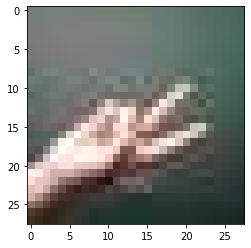

예측확률분포: [7.2617717e-03 1.2625068e-04 9.9261206e-01 4.5177462e-11 2.5039202e-13
 8.1863058e-12 9.9767189e-13 9.7697681e-09 4.5409205e-09 1.0810084e-08]
라벨: 1, 예측결과: 2


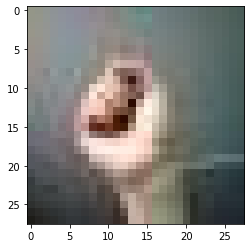

예측확률분포: [7.14005679e-02 2.11425826e-01 7.17172563e-01 2.69803451e-08
 7.70161643e-11 3.53919088e-10 1.41450837e-10 1.08478076e-07
 5.49069227e-07 3.81032720e-07]
라벨: 0, 예측결과: 2


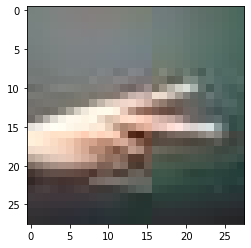

In [28]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [67]:
# 더 좋은 네트워크 만들어 보기

# 바꿔 볼 수 있는 하이퍼파라미터들 
# 16 / 32 / 32 / 10 ( loss: 1.1081 - accuracy: 0.3933 )
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_35 (Dense)             (None, 10)              

In [69]:
# 더 좋은 네트워크 만들어 보기

# 바꿔 볼 수 있는 하이퍼파라미터들  
# 16 / 32 / 32 / 10 ( loss: 1.1081 - accuracy: 0.3933 )
# 32 / 32 / 32 / 10 ( loss: 1.1381 - accuracy: 0.3667 ) 
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_39 (Dense)             (None, 10)              

In [72]:
# 더 좋은 네트워크 만들어 보기

# 바꿔 볼 수 있는 하이퍼파라미터들  
# 16 / 32 / 32 / 10 ( loss: 1.1081 - accuracy: 0.3933 )
# 32 / 32 / 32 / 10 ( loss: 1.1381 - accuracy: 0.3667 ) 
# 32 / 32 / 16 / 10 ( loss: 1.1517 - accuracy: 0.3867 ) 
n_channel_1=32
n_channel_2=32
n_dense=16
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 16)                12816     
_________________________________________________________________
dense_45 (Dense)             (None, 10)              

In [71]:
# 더 좋은 네트워크 만들어 보기

# 바꿔 볼 수 있는 하이퍼파라미터들  
# 16 / 32 / 32 / 10 ( loss: 1.1081 - accuracy: 0.3933 )
# 32 / 32 / 32 / 10 ( loss: 1.1381 - accuracy: 0.3667 ) 
# 32 / 32 / 16 / 10 ( loss: 1.1517 - accuracy: 0.3867 ) 
# 8 / 8 / 32 / 10 ( loss: 1.1021 - accuracy: 0.4300 ) 
n_channel_1=8
n_channel_2=8
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 8)         584       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 200)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                6432      
_________________________________________________________________
dense_43 (Dense)             (None, 10)              

In [73]:
# 더 좋은 네트워크 만들어 보기

# 바꿔 볼 수 있는 하이퍼파라미터들  
# 16 / 32 / 32 / 10 ( loss: 1.1081 - accuracy: 0.3933 )
# 32 / 32 / 32 / 10 ( loss: 1.1381 - accuracy: 0.3667 ) 
# 32 / 32 / 16 / 10 ( loss: 1.1517 - accuracy: 0.3867 ) 
# 8 / 8 / 32 / 10 ( loss: 1.1021 - accuracy: 0.4300 ) 
# 32 / 64 / 32 / 10 ( loss: 1.3888 - accuracy: 0.3700 ) 
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_47 (Dense)             (None, 10)              

In [74]:
# 더 좋은 네트워크 만들어 보기

# 바꿔 볼 수 있는 하이퍼파라미터들  
# 16 / 32 / 32 / 10 ( loss: 1.1081 - accuracy: 0.3933 )
# 32 / 32 / 32 / 10 ( loss: 1.1381 - accuracy: 0.3667 ) 
# 32 / 32 / 16 / 10 ( loss: 1.1517 - accuracy: 0.3867 ) 
# 8 / 8 / 32 / 10 ( loss: 1.1021 - accuracy: 0.4300 ) 
# 32 / 64 / 32 / 10 ( loss: 1.3888 - accuracy: 0.3700 ) 
# 16 / 16 / 32 / 10 ( loss: 1.3888 - accuracy: 0.3700 ) 

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                12832     
_________________________________________________________________
dense_49 (Dense)             (None, 10)              

#### 파라미터 조정만으로는 원하는 수치가 나오지 않음, 추가 데이터 학습

#### 추가 데이터(3,207, /rock_scissor_paper_others/) 학습 및 데이터 확인 

학습데이터(x_train)의 이미지 개수는 3207 입니다.
x_other_test shape: (3207, 28, 28, 3)
y_other_test shape: (3207,)
다른 사람의 데이터 라벨:  0


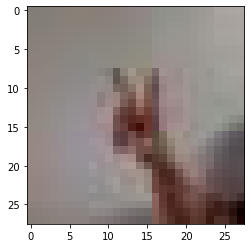

In [76]:
# 추가 데이터 준비 ( 3,207 )
other_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_others/"
(x_other_test, y_other_test)=load_data(other_image_dir_path, 3207)
x_other_test_norm = x_other_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_other_test shape: {}".format(x_other_test.shape))
print("y_other_test shape: {}".format(y_other_test.shape))

# 이미지 확인
plt.imshow(x_other_test[0])
print('다른 사람의 데이터 라벨: ', y_other_test[0])

In [84]:
# 추가 데이터 학습
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_other_test_norm, y_other_test, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_65 (Dense)             (None, 10)              

#### accuracy값이 늘어나도록 n_train_epoch횟수를 증가시켜서 교육 실시

#### 파라미터 조정 ( ntrain_epoch 10 -> 20 )

In [85]:
# 추가 데이터 학습 ( 기본값 진행시 n_train_epoch : 10 증가 )
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_other_test_norm, y_other_test, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_67 (Dense)             (None, 10)              

#### n_channel_1=16 / n_channel_2=32 /  n_dense=32 / n_train_epoch=20
#### loss: 0.0805 - accuracy: 0.9900 

#### 파라미터 조정 ( ntrain_epoch 10 -> 20, dense 32 -> 64 )

In [89]:
# 추가 데이터 학습 ( 기본값 진행시 n_train_epoch : 10 증가, dense 32 증가 )
n_channel_1=16
n_channel_2=32  
n_dense=64            # 32- > 64
n_train_epoch=20      # 10 -> 20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_other_test_norm, y_other_test, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_75 (Dense)             (None, 10)              

#### n_channel_1=16 / n_channel_2=32 /  n_dense=64 / n_train_epoch=20
#### loss: 0.0439 - accuracy: 0.9900